## Crawler code

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import deque
from IPython.display import Image, display
import os
import urllib
import shutil

# Extracting attributes
def extract_text(soup, page):
    text = soup.get_text()
    num = int(input('How many words you want to see? '))
    print('Text:', text.split()[:num])
    with open('texts/' + str(page) + '/text.txt', 'w') as file:
        file.write(' '.join(text.split()[:num]))



# Extracting images
def extract_images(soup, page):
    images = soup.find_all('img')
    i = 0
    num = int(input('How many pictures you want to download? '))
    for img in images:
        i += 1
        if i == num + 1: break
        img_url = img['src']
        if img_url[0] == img_url[1] == '/':
           img_url = 'https:' + img_url
        elif img_url[0] == '/' and img_url[1] != '/':
           img_url = 'https:/' + img_url
        else: return 0
        img_name = img_url.split('/')[-1]
        try:
            urllib.request.urlretrieve(img_url, '/'.join(['images', str(page), img_name]))
            img_resp = requests.get(img_url)
            display(Image(img_resp.content))
            print('Image downloaded:', img_url)

        except:
            print(f'couldn\'t download {img_url}')


# Extracting audio
def extract_audio(soup, page):
    audio = soup.find_all('audio')
    i = 0
    num = int(input('How many audios you want to download? '))
    for aud in audio:
        i += 1
        if i == num + 1: break
        aud_url = next(iter(aud))['src']
        if aud_url[0] == aud_url[1] == '/':
           aud_url = 'https:' + aud_url
        elif aud_url[0] == '/' and aud_url[1] != '/':
           aud_url = 'https:/' + aud_url
        else: return 0
        aud_name = aud_url.split('/')[-1]
        try:
            urllib.request.urlretrieve(aud_url, '/'.join(['audios', str(page), aud_name]))
            print('Audio downloaded:', aud_url)
        except:
            print(f'couldn\'t download {aud_url}')


#  Depth first crawler function
def depth_first_crawler(url, max_depth, opts, visited=set()):
    if max_depth == 0 or url in visited:
        return

    if not os.path.exists('images/' + str(len(visited))):
        os.makedirs('images/' + str(len(visited)))
    if not os.path.exists('audios/' + str(len(visited))):
        os.makedirs('audios/'+ str(len(visited)))
    if not os.path.exists('texts/' + str(len(visited))):
        os.makedirs('texts/' + str(len(visited)))
    visited.add(url)
    print("Visiting page:", url)

    response = requests.get(url)
    content = response.text

    soup = BeautifulSoup(content, 'html.parser')
    links = soup.find_all('a')
    if opts[0] == 1:
      extract_text(soup, len(visited)-1)
    if opts[1] == 1:
      extract_images(soup, len(visited)-1)
    if opts[2] == 1:
      extract_audio(soup, len(visited)-1)

    for link in links:
        href = link.get('href')
        if href is not None:
            if href.startswith("http://") or href.startswith("https://"):
              new_url = href
            else:
              new_url = url.rstrip('/') + '/' + href.lstrip('/')
            depth_first_crawler(new_url, max_depth - 1, opts, visited)
            break


# Breadth first crawler function
def breadth_first_crawler(start_url, max_pages, opts):
    visited = set()
    queue = deque([(start_url, 0)])
    page = 1


    while queue and page <= max_pages:
        if not os.path.exists('images/' + str(page-1)):
            os.makedirs('images/' + str(page-1))
        if not os.path.exists('audios/' + str(page-1)):
            os.makedirs('audios/'+ str(page-1))
        if not os.path.exists('texts/' + str(page-1)):
            os.makedirs('texts/' + str(page-1))

        url, depth = queue.popleft()

        if url in visited:
            continue

        visited.add(url)
        print("Visiting page:", url)

        response = requests.get(url)
        content = response.text

        soup = BeautifulSoup(content, 'html.parser')
        links = soup.find_all('a')
        if opts[0] == 1:
            extract_text(soup, page-1)
        if opts[1] == 1:
            extract_images(soup, page-1)
        if opts[2] == 1:
            extract_audio(soup, page-1)

        for link in links:
            href = link.get('href')
            if href is None:
                continue
            if href.startswith("http://") or href.startswith("https://"):
              new_url = href
            else:
              new_url = url.rstrip('/') + '/' + href.lstrip('/')

            if new_url is not None and new_url not in visited:
                queue.append((new_url, depth + 1))

        page += 1


# Interface
def crawler():
  print('Hello! I am a web-crawler! ')
  if not os.path.exists('images'):
      os.makedirs('images')
  if not os.path.exists('audios'):
      os.makedirs('audios')
  if not os.path.exists('texts'):
      os.makedirs('texts')
  while 1:
    inp = input('\n I can do the following: \n 1 - do depth first search \n 2 - do breadth first search \n x - exit \n')
    if inp == '1':
      url = input('Enter start url: ')
      depth = input('Enter the depth: ')
      opts = []
      opts.append(int(input('Do you want to see attributes? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see pictures? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see audio? 0 - no, 1 - yes: ')))
      depth_first_crawler(url, int(depth), opts)
      print('Finished')
    elif inp == '2':
      url = input('Enter start url: ')
      depth = input('Enter the breadth: ')
      opts = []
      opts.append(int(input('Do you want to see attributes? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see pictures? 0 - no, 1 - yes: ')))
      opts.append(int(input('Do you want to see audio? 0 - no, 1 - yes: ')))
      breadth_first_crawler(url, int(depth), opts)
      print('Finished')
    elif inp == 'x':
      break
    else:
      print('Error, try again')

## Call this function to start crawling
#crawler()

## Example of usage

Hello! I am a web-crawler! 

 I can do the following: 
 1 - do depth first search 
 2 - do breadth first search 
 x - exit 
1
Enter start url: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F
Enter the depth: 3
Do you want to see attributes? 0 - no, 1 - yes: 1
Do you want to see pictures? 0 - no, 1 - yes: 1
Do you want to see audio? 0 - no, 1 - yes: 1
Visiting page: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F
How many words you want to see? 5
Text: ['Россия', '—', 'Википедия', '66°', 'с.']
How many pictures you want to download? 3


Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Font_Awesome_5_solid_volume-up.svg/18px-Font_Awesome_5_solid_volume-up.svg.png


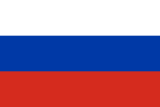

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Russia.svg/160px-Flag_of_Russia.svg.png


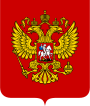

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Coat_of_Arms_of_the_Russian_Federation.svg/90px-Coat_of_Arms_of_the_Russian_Federation.svg.png
How many audios you want to download? 2
Audio downloaded: https://upload.wikimedia.org/wikipedia/commons/f/fc/Russian_Anthem_chorus.ogg
Audio downloaded: https://upload.wikimedia.org/wikipedia/commons/7/72/Ru-Russia_part_1_Intro.ogg
Visiting page: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:Map/3/66/94/ru
How many words you want to see? 20
Text: ['Россия/wiki/Служебная:Map/3/66/94/ru', '—', 'Википедия', 'Россия/wiki/Служебная:Map/3/66/94/ru', 'Материал', 'из', 'Википедии', '—', 'свободной', 'энциклопедии', 'Перейти', 'к', 'навигации', 'Перейти', 'к', 'поиску', 'В', 'Википедии', 'нет', 'статьи']
How many pictures you want to download? 2


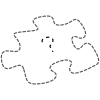

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Wiki_letter_w_dashed.svg/100px-Wiki_letter_w_dashed.svg.png


Image downloaded: https://ru.wikipedia.org/wiki/Special:CentralAutoLogin/start?type=1x1
How many audios you want to download? 1
Visiting page: https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:Map/3/66/94/ru/#mw-head
How many words you want to see? 7
Text: ['Россия/wiki/Служебная:Map/3/66/94/ru/', '—', 'Википедия', 'Россия/wiki/Служебная:Map/3/66/94/ru/', 'Материал', 'из', 'Википедии']
How many pictures you want to download? 1


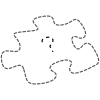

Image downloaded: https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Wiki_letter_w_dashed.svg/100px-Wiki_letter_w_dashed.svg.png
How many audios you want to download? 3
Finished

 I can do the following: 
 1 - do depth first search 
 2 - do breadth first search 
 x - exit 
x


In [2]:
crawler()